### Preparando dados

In [58]:
import pandas as pd

path = r'/home/lapisco/Desktop/ICA/ICA/Dados/datasets/artificial/brasil/data.csv'

data = pd.read_csv(path)

data = pd.DataFrame(data)

### Visualização dos dados

In [59]:
data.head()

,162,113,1
0,175,32,1
1,115,112,1
2,2,45,1
3,82,85,2
4,50,3,1


<Axes: xlabel='162', ylabel='113'>

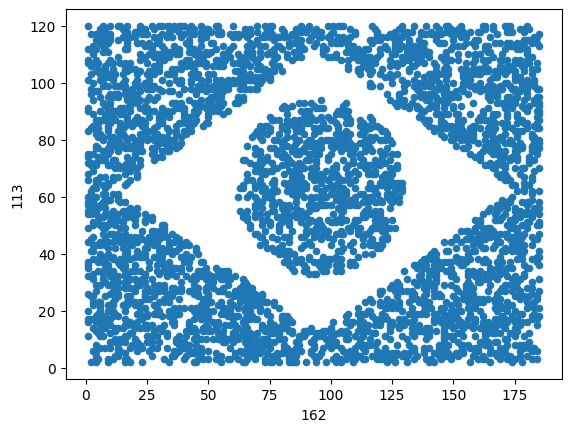

In [60]:
data.plot(kind='scatter', x='162', y = '113')

### Pré-processamento dos dados

In [22]:
# Pré-processamento
#   Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(data)

dados_normalizados = pd.DataFrame(normalizador.transform(data), columns = data.columns)
dados_normalizados.head()

X = dados_normalizados.drop(columns='1')
y = dados_normalizados['1']

In [23]:
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Para mostrar as metricas

def metricas(matriz_confusao):
    VP, FN = matriz_confusao[0]
    FP, VN = matriz_confusao[1]
    sensibilidade = VP/(VP+FN)
    especificidade =VN/(FP+VN)
    acuracia = (VP + VN)/(VP+FN+FP+VN)
    return [sensibilidade, especificidade, acuracia]
    

### MLP

In [67]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=100, solver='adam')
mlp.fit(X_train, y_train)
predi = mlp.predict(X_test)

# Matriz de confusão para calcular as métricas
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predi)

/home/lapisco/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[624,   0],
       [  0, 146]])

In [68]:
metrics = metricas(confusion_matrix(y_test, predi))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')


SENSIBILIDADE: 1.0; ESPECIFICIDADE: 1.0;  ACURÁCIA: 1.0


### Naive Bayes

In [69]:
from sklearn.naive_bayes import GaussianNB

naiveBayesGaussian = GaussianNB()
naiveBayesGaussian.fit(X_train, y_train)
prediNB = naiveBayesGaussian.predict(X_test)

print(confusion_matrix(prediNB, y_test))

[[624  73]
 [  0  73]]


In [70]:
metrics = metricas(confusion_matrix(prediNB, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.8952654232424677; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.9051948051948052


### SVM RBF

In [71]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',C=5, gamma=0.1)

svc.fit(X_train, y_train)
prediSVC = svc.predict(X_test)

print(confusion_matrix(prediSVC, y_test))

[[624 143]
 [  0   3]]


In [72]:
metrics = metricas(confusion_matrix(prediSVC, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.8135593220338984; ESPECIFICIDADE: 1.0;  ACURÁCIA: 0.8142857142857143


### SVM Polinomial

In [75]:
from sklearn.svm import SVC

svc_pol = SVC(kernel='poly', C=4, gamma=2, degree=4)


svc_pol.fit(X_train, y_train)
prediSVC_poli = svc_pol.predict(X_test)

print(confusion_matrix(prediSVC_poli, y_test))

[[624 146]
 [  0   0]]


In [76]:
metrics = metricas(confusion_matrix(prediSVC_poli, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.8103896103896104; ESPECIFICIDADE: nan;  ACURÁCIA: 0.8103896103896104


/tmp/ipykernel_4316/662972416.py:7: RuntimeWarning: invalid value encountered in scalar divide
  especificidade =VN/(FP+VN)


### SVM Linear

In [77]:
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=9, gamma=5, degree=4)


svc_lin.fit(X_train, y_train)
prediSVC_lin = svc_lin.predict(X_test)

print(confusion_matrix(prediSVC_lin, y_test))


[[624 146]
 [  0   0]]


In [78]:
metrics = metricas(confusion_matrix(prediSVC_lin, y_test))
print(f'SENSIBILIDADE: {metrics[0]}; ESPECIFICIDADE: {metrics[1]};  ACURÁCIA: {metrics[2]}')

SENSIBILIDADE: 0.8103896103896104; ESPECIFICIDADE: nan;  ACURÁCIA: 0.8103896103896104


/tmp/ipykernel_4316/662972416.py:7: RuntimeWarning: invalid value encountered in scalar divide
  especificidade =VN/(FP+VN)
